<a href="https://colab.research.google.com/github/SilviaVock/IEEE-MMM-2023-Hands-on-tutorial/blob/main/Example_XX__MNIST_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test accuracy: 90.83%
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 29  0  1  0  0  0  0  0  6]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 26  0  2  0  2  6  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  2  0  1  1  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  1 34]]


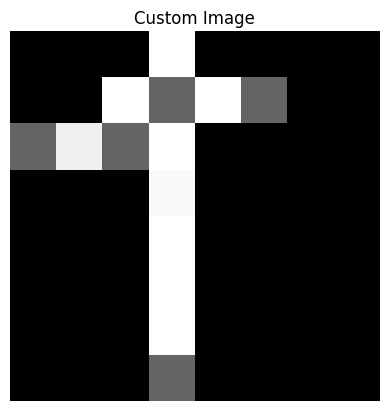

Predicted class for custom image: 1


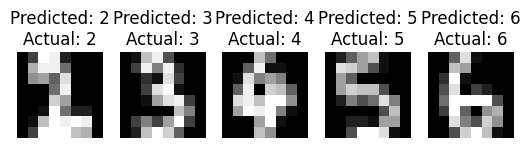

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
import matplotlib.image as mpimg

# Step 1: Load and Prepare the Dataset
# Load the MNIST dataset (a smaller version) from scikit-learn
digits = datasets.load_digits()

# Prepare the data and labels
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Normalize the data to a range [0, 1]
X = X / 255.0

# Split the data into training and testing sets
n_split = n_samples * 4 // 5
X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

# Step 2: Train a Deep Neural Network (DNN) Classifier
# Create an MLPClassifier (DNN) with one hidden layer
clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

# Train the DNN classifier on the training data
model=clf.fit(X_train, y_train)

# Step 3: Evaluate the Model
accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

#Confusion Matrix
prediction =  model.predict(X_test)
matrix = confusion_matrix(y_true=y_test, y_pred=prediction)
print(matrix)

# Step 4: Create your own sample image
image_data = np.array([
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 255, 100, 255, 100, 0, 0],
    [100, 240, 100, 255, 0, 0, 0, 0],
    [0, 0, 0, 250, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 100, 0, 0, 0, 0]
], dtype=np.uint8)

# Convert the NumPy array to a PIL Image object
image = Image.fromarray(image_data)

# Save the image as a PNG file (optional)
image.save("grayscale_image.png")

# Display the image using matplotlib (optional)
img = mpimg.imread("grayscale_image.png")
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axis labels and ticks
plt.title("Custom Image")
plt.show()

# Step 5: Make Predictions on Your Sample Image
# Reshape your image data to match the input format (8x8) used by the model
sample_image = image_data.reshape(1, -1)

# Make a prediction using the trained DNN classifier
predicted_class = clf.predict(sample_image)[0]
print(f"Predicted class for custom image: {predicted_class}")

# Step 6: Display Example Images and Predicted Classes
# Display the first 5 example images from the test set along with their predicted classes
n_display = 5
for i in range(n_display):
    plt.subplot(1, n_display, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {clf.predict(X_test[i:i+1])[0]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.show()


Test accuracy: 90.83%


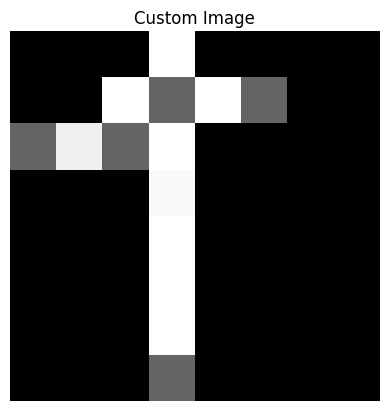

Predicted class for custom image: 1


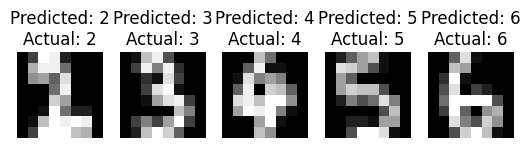

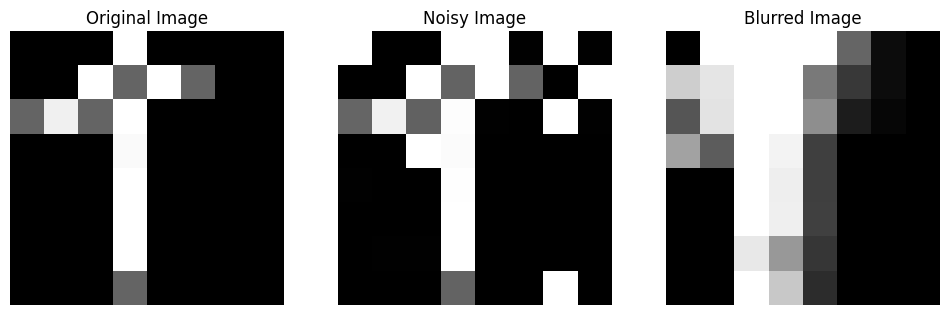

Predicted class for noisy image: 9
Predicted class for blurred image: 5


<ipython-input-10-2389ded46a40>:133: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  sample_noisy_image = noisy_image.resize((8, 8), Image.ANTIALIAS).convert('L')
<ipython-input-10-2389ded46a40>:134: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  sample_blurred_image = blurred_image.resize((8, 8), Image.ANTIALIAS).convert('L')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from PIL import Image, ImageFilter
import matplotlib.image as mpimg
import cv2  # Import OpenCV

# Define a function to apply camera-typical faults or corruptions
def apply_corruption(image):
    # Convert PIL Image to NumPy array
    image_array = np.array(image)

    # Add Gaussian noise
    noisy_image = image_array + np.random.normal(0, 0.8, image_array.shape)

    # Apply motion blur (custom kernel)
    kernel = np.array([[1, 2, 9],
                       [2, 4, 2],
                       [1, 9, 9]]) / 16.0
    blurred_image = cv2.filter2D(image_array, -1, kernel)

  # Convert blurred_image back to PIL Image
    blurred_image_pil = Image.fromarray(np.uint8(blurred_image))

    return noisy_image, blurred_image_pil

# Step 1: Load and Prepare the Dataset
# Load the MNIST dataset (a smaller version) from scikit-learn
digits = datasets.load_digits()

# Prepare the data and labels
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Normalize the data to a range [0, 1]
X = X / 255.0

# Split the data into training and testing sets
n_split = n_samples * 4 // 5
X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

# Step 2: Train a Deep Neural Network (DNN) Classifier
# Create an MLPClassifier (DNN) with one hidden layer
clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)

# Train the DNN classifier on the training data
clf.fit(X_train, y_train)

# Step 3: Evaluate the Model
accuracy = clf.score(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

# Step 4: Create your own sample image
image_data = np.array([
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 255, 100, 255, 100, 0, 0],
    [100, 240, 100, 255, 0, 0, 0, 0],
    [0, 0, 0, 250, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 100, 0, 0, 0, 0]
], dtype=np.uint8)

# Convert the NumPy array to a PIL Image object
image = Image.fromarray(image_data)

# Save the image as a PNG file (optional)
image.save("grayscale_image.png")

# Display the image using matplotlib (optional)
img = mpimg.imread("grayscale_image.png")
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axis labels and ticks
plt.title("Custom Image")
plt.show()

# Step 5: Make Predictions on Your Sample Image
# Reshape your image data to match the input format (8x8) used by the model
sample_image = image_data.reshape(1, -1)

# Make a prediction using the trained DNN classifier
predicted_class = clf.predict(sample_image)[0]
print(f"Predicted class for custom image: {predicted_class}")

# Step 6: Display Example Images and Predicted Classes
# Display the first 5 example images from the test set along with their predicted classes
n_display = 10
for i in range(n_display):
    plt.subplot(1, n_display, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {clf.predict(X_test[i:i+1])[0]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.show()

# Apply corruptions to the custom image
noisy_image, blurred_image = apply_corruption(image)

# Save the corrupted images as PNG files (optional)
noisy_image = Image.fromarray(np.uint8(noisy_image))
noisy_image.save("noisy_image.png")

blurred_image.save("blurred_image.png")

# Display the original, noisy, and blurred images using matplotlib (optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Image")

# Use LANCZOS resampling filter instead of ANTIALIAS
plt.subplot(1, 3, 2)
noisy_img = noisy_image.resize((8, 8), Image.LANCZOS)
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")

plt.subplot(1, 3, 3)
blurred_img = blurred_image.resize((8, 8), Image.LANCZOS)
plt.imshow(blurred_img, cmap='gray')
plt.axis('off')
plt.title("Blurred Image")

plt.show()

# Step 5: Make Predictions on Your Sample Images
# Reshape the corrupted images to match the input format (8x8) used by the model
sample_noisy_image = noisy_image.resize((8, 8), Image.ANTIALIAS).convert('L')
sample_blurred_image = blurred_image.resize((8, 8), Image.ANTIALIAS).convert('L')

sample_noisy_data = np.array(sample_noisy_image).reshape(1, -1)
sample_blurred_data = np.array(sample_blurred_image).reshape(1, -1)

# Make predictions using the trained DNN classifier for noisy and blurred images
predicted_class_noisy = clf.predict(sample_noisy_data)[0]
predicted_class_blurred = clf.predict(sample_blurred_data)[0]

print(f"Predicted class for noisy image: {predicted_class_noisy}")
print(f"Predicted class for blurred image: {predicted_class_blurred}")
